In [50]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
db = mysql.connector.connect(user='root', password='hello_world', host='localhost', database='Ecommerce')
cus = db.cursor()

In [52]:
cus.execute("SELECT * FROM customer")
#data = cus.fetchall()
customer_data = pd.DataFrame(cus.fetchall(), columns=[desc[0] for desc in
cus.description])
print(customer_data.head())
print(customer_data['city'].value_counts())

#plt.pie(customer_data['city'].value_counts())
#plt.show()

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


In [53]:
cus.execute("SELECT * FROM product")
#data1 = cus.fetchall()
product_data = pd.DataFrame(cus.fetchall(), columns=[desc[0] for desc in
cus.description])
#print(product_data.head())


In [54]:
cus.execute("SELECT * FROM order_details")
#data2 = cus.fetchall()
order_data = pd.DataFrame(cus.fetchall(), columns=[desc[0] for desc in
cus.description])

#print(order_data.head())


city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


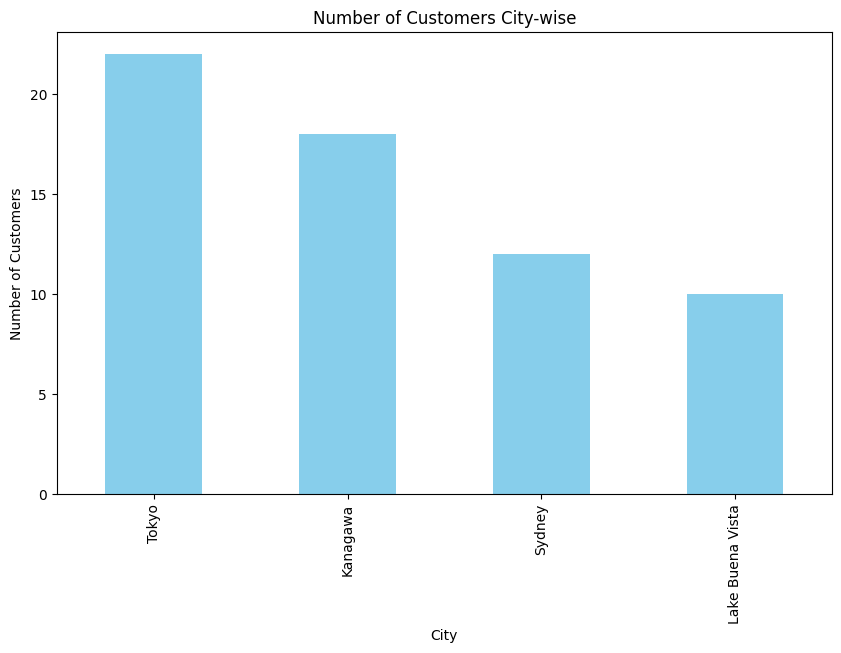

In [55]:
# Identify the total number of customers city wise.
city_wise_customers = customer_data['city'].value_counts()
print (city_wise_customers)
plt.figure(figsize=(10, 6))
city_wise_customers.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
# plt.xticks(rotation=45)
# plt.tight_layout()

# Show the plot
plt.show()

customer_id
C1005    3
C1010    3
C1009    3
C1013    3
C1006    2
C1008    2
C1003    2
C1014    2
C1011    2
C1015    2
Name: count, dtype: int64


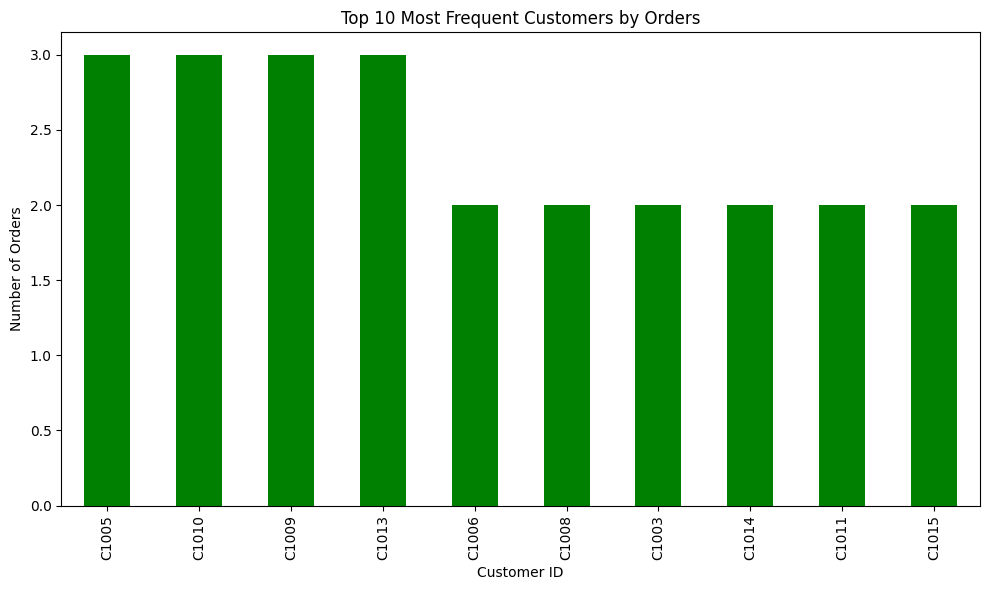

In [56]:
# Identify the most frequent customers based on their order history
frequent_customers = order_data['customer_id'].value_counts().head(10)
print (frequent_customers)  # print most frequent customer

plt.figure(figsize=(10, 6))
frequent_customers.plot(kind='bar', color='green')

# Labels and title
plt.title('Top 10 Most Frequent Customers by Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64


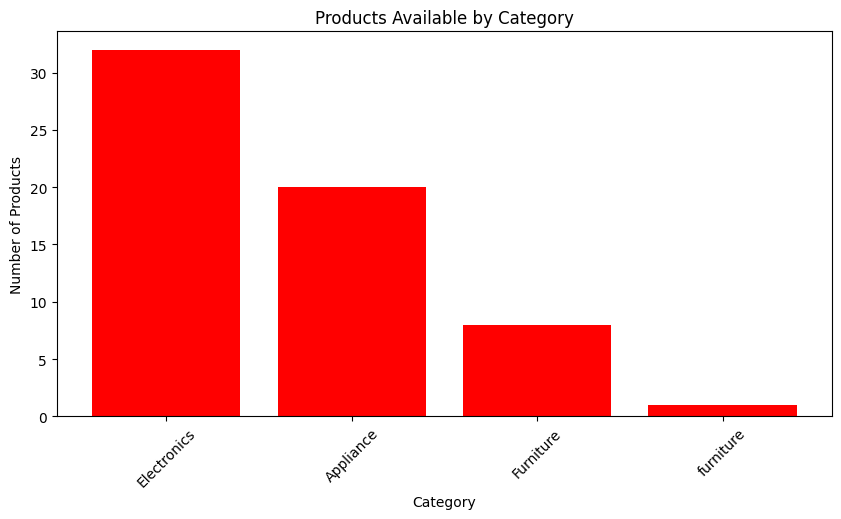

In [57]:
# Determine the total number of products available by category.
product_category_counts = product_data['category'].value_counts()
print(product_category_counts)

plt.figure(figsize=(10, 5))
plt.bar(product_category_counts.index, product_category_counts.values, color='red')
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Products Available by Category")
plt.xticks(rotation=45)
plt.show()


sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Chairs            2
Lamps             2
Accessories       2
Tablets           2
computer          1
Mobiles           1
phone             1
TVs               1
Desks             1
Cameras           1
Sofas             1
Tables            1
chairs            1
Consoles          1
Printers          1
Furniture         1
Photography       1
Name: count, dtype: int64


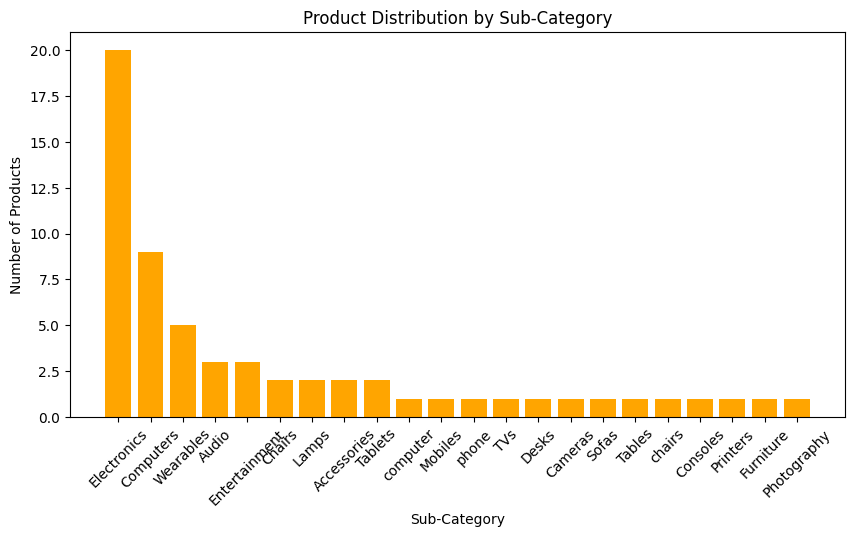

In [58]:
# Analyze the distribution of products across sub-categories
subcategory_counts = product_data['sub_category'].value_counts()
print(subcategory_counts)

plt.figure(figsize=(10, 5))
plt.bar(subcategory_counts.index, subcategory_counts.values, color='orange')
plt.xlabel("Sub-Category")
plt.ylabel("Number of Products")
plt.title("Product Distribution by Sub-Category")
plt.xticks(rotation=45)
plt.show()

   product_id product_name     category sub_category  original_price  \
0        P102        Chair    furniture       Chairs         20000.0   
3        P105      Blender    Appliance  Electronics           500.0   
10       P112        chair    Furniture       chairs          1000.0   
30       P132     Sofa Set    Furniture    Furniture         50000.0   
39       P141      Printer  Electronics    Computers         12000.0   
46       P148       Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
30        45000.0     10  
39        10000.0     10  
46        25000.0     10  


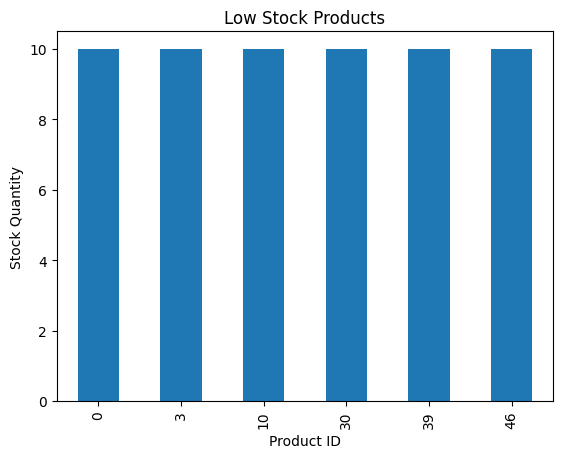

In [59]:
# Identify products with low stock levels.
low_stock_products = product_data[product_data['stock'] < product_data['stock'].quantile(0.1)]
print(low_stock_products)
low_stock_products['stock'].plot(kind='bar')
plt.title('Low Stock Products')
plt.xlabel('Product ID')
plt.ylabel('Stock Quantity')
plt.show()

Text(0.5, 1.0, 'Average, Minimum, Maximum Price of Products')

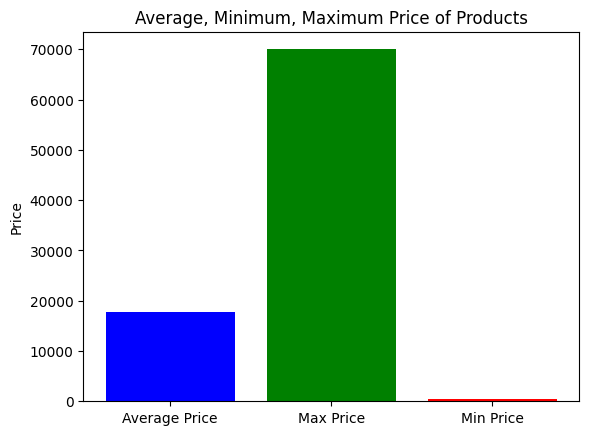

In [60]:
# 6. Calculate price statistics

average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()
price_summary = pd.DataFrame({
    'Metric': ['Average Price', 'Max Price', 'Min Price'],
    'Value': [average_price, max_price, min_price]
})

plt.bar(price_summary['Metric'], price_summary['Value'], color=['blue', 'green', 'red'])
plt.ylabel("Price")
plt.title("Average, Minimum, Maximum Price of Products")

product_name
Tablet            4
Smartwatch        3
Vacuum Cleaner    3
Desk Lamp         2
Microwave Oven    2
Gaming Console    2
Printer           2
Digital Camera    2
Headphones        2
Television        2
Name: count, dtype: int64


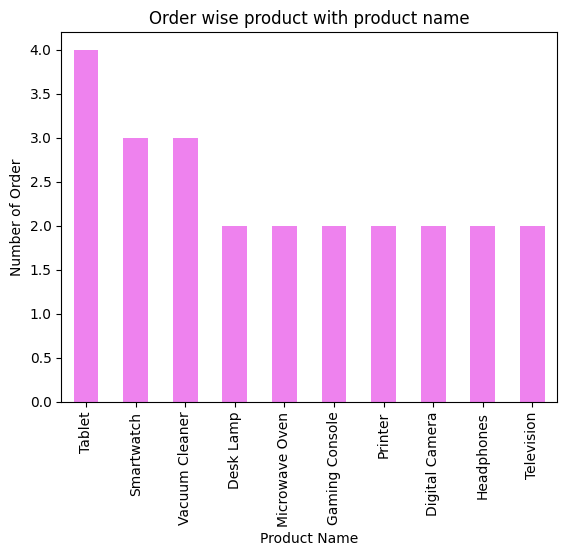

In [61]:
# Calculate the top 10 orders product wise.
df=product_data['product_name'].value_counts().head(10) # Distribution of products across sub category
print(df)

df.plot(kind='bar', color='violet')
plt.xlabel("Product Name")
plt.ylabel("Number of Order")
plt.title("Order wise product with product name")

plt.show()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


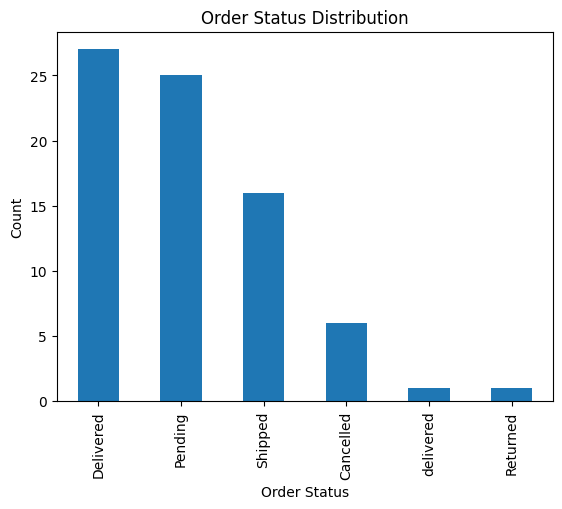

In [62]:
# Order status distribution
order_status_counts = order_data['order_status'].value_counts()
print(order_status_counts)
order_status_counts.plot(kind='bar')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

product_id
P110    4.0
P108    4.0
P114    3.0
P102    3.0
P109    3.0
P111    3.0
P125    3.0
P119    3.0
P117    3.0
P115    3.0
Name: quantity, dtype: float64


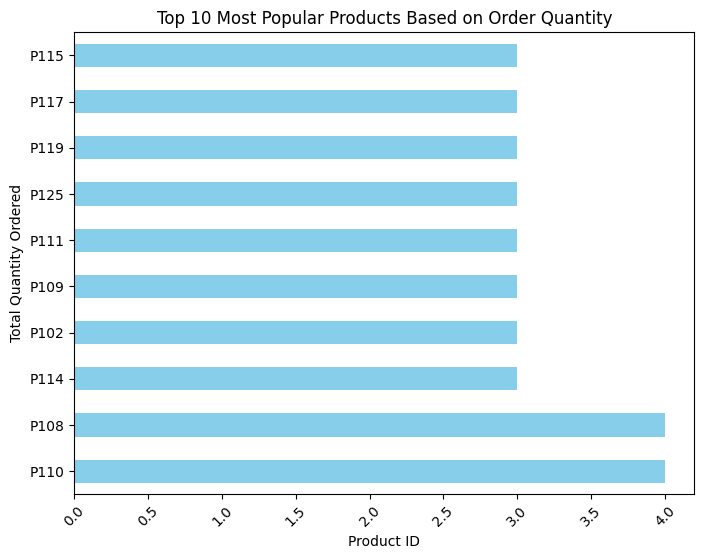

In [63]:
# Identify the most popular products based on order quantity.
popular_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
print(popular_products.head(10))
plt.figure(figsize=(8, 6))
popular_products.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

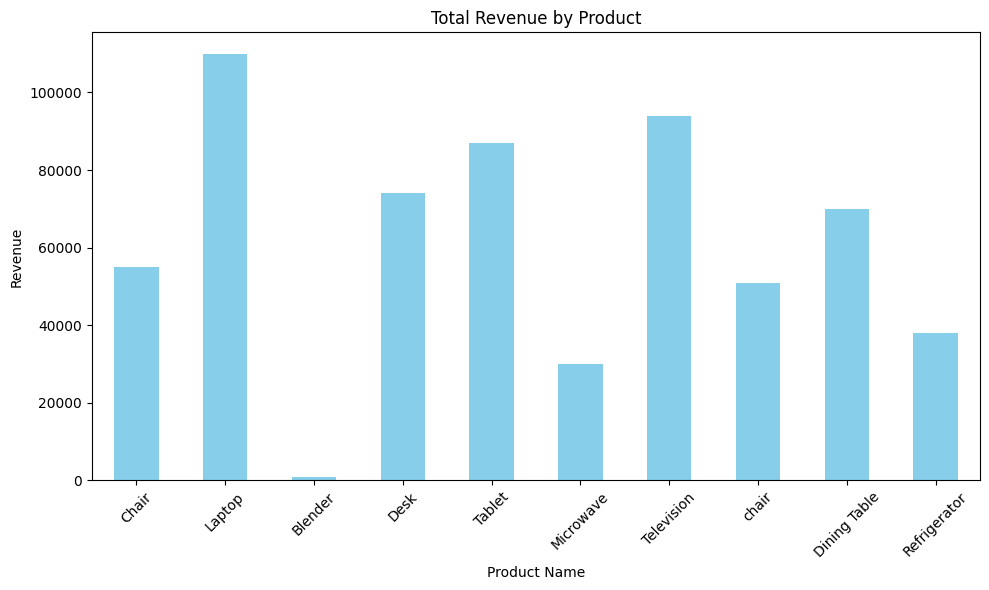

In [64]:
# Total revenue product-wise
product_revenue = order_data.groupby('product_id')['total_price'].sum().head(10)
product_names = product_data.set_index('product_id').loc[product_revenue.index, 'product_name']
plt.figure(figsize=(10, 6))
product_revenue.index = product_names
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# Calculate total revenue product category wise percentage
category_revenue = order_data.merge(product_data, on='product_id').groupby('category')['total_revenue'].sum()
print(category_revenue)
category_revenue.plot(kind='pie',autopct='%1.1f%%')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


KeyError: 'Column not found: total_revenue'

1586400.0


Text(0.5, 1.0, 'Total Revenue Generated from Orders')

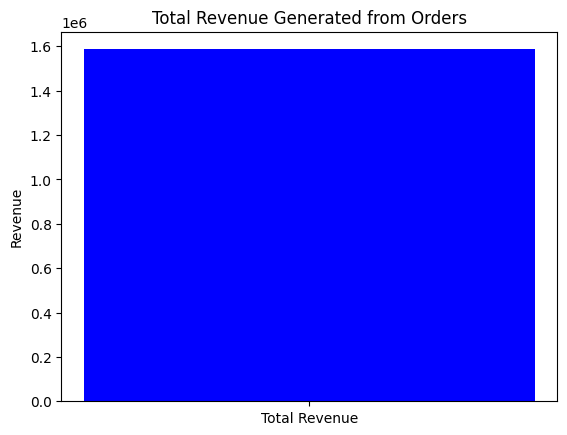

In [66]:
# 12. Calculate the total revenue generated from all orders
total_revenue = order_data['total_price'].sum()
print(total_revenue)
# Plot bar chart
plt.bar(['Total Revenue'], [total_revenue], color='blue')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated from Orders')

           product_name  profit
3               Blender   -50.0
10                chair  -200.0
17            Desk Lamp  -500.0
49         Gaming Mouse  -500.0
52       Wireless Mouse  -500.0
58     Portable Speaker  -500.0
59          Smart Scale  -500.0
16           Headphones -1000.0
42  External Hard Drive -1000.0
44         Coffee Maker -1000.0


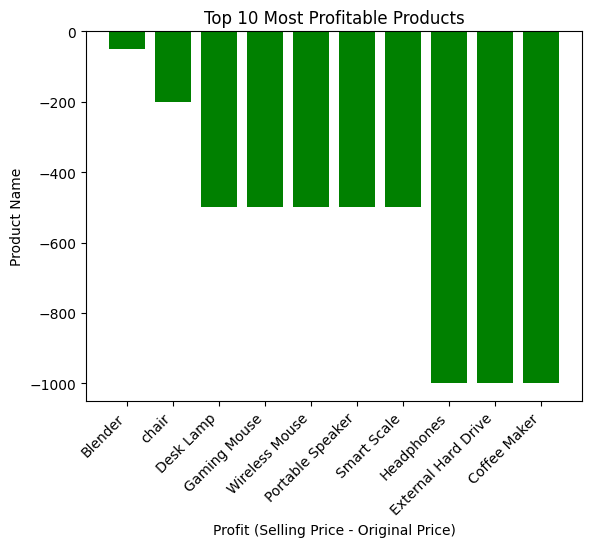

In [67]:
# Identify the most profitable products based on the difference between original and selling prices.

product_data['profit'] = product_data['selling_price'] - product_data['original_price']
profitable_products = product_data.nlargest(10, 'profit') # get top 10

plt.bar(profitable_products['product_name'], profitable_products['profit'], color='green')
plt.xlabel("Profit (Selling Price - Original Price)")
plt.ylabel("Product Name")
plt.title("Top 10 Most Profitable Products")
plt.xticks(rotation=45, ha='right')

print(profitable_products[['product_name', 'profit']])

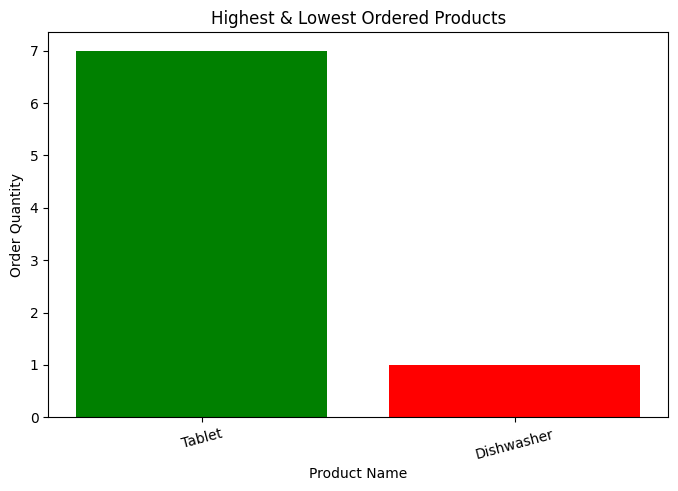

In [68]:
# Most and least ordered products
product_orders = order_data.merge(product_data, on='product_id').groupby("product_name")["quantity"].sum()
highest_ordered_product = product_orders.idxmax()
lowest_ordered_product = product_orders.idxmin()
highest_quantity = product_orders.max()
lowest_quantity = product_orders.min()
top_bottom_products = {
    highest_ordered_product: highest_quantity,
    lowest_ordered_product: lowest_quantity
}
plt.figure(figsize=(8, 5))
plt.bar(top_bottom_products.keys(), top_bottom_products.values(), color=['green', 'red'])
plt.xlabel("Product Name")
plt.ylabel("Order Quantity")
plt.title("Highest & Lowest Ordered Products")
plt.xticks(rotation=15)
plt.show()

Highest Order Quantity: 5.0 by Oliver
Lowest Order Quantity: 1.0 by Jackson


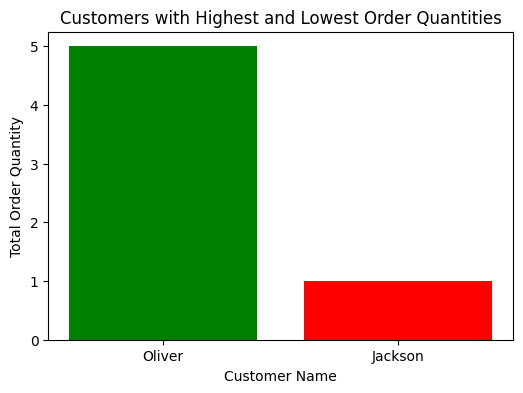

In [69]:
# Identify customers with the highest and lowest order quantities
customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum()
highest_order_customer = customer_order_quantities.idxmax()
highest_order_quantity = customer_order_quantities.max()
highest_customer_name = customer_data[customer_data['customer_id'] == highest_order_customer]['name'].values[0]
lowest_order_customer = customer_order_quantities.idxmin()
lowest_order_quantity = customer_order_quantities.min()
lowest_customer_name = customer_data[customer_data['customer_id'] == lowest_order_customer]['name'].values[0]
print(f'Highest Order Quantity: {highest_order_quantity} by {highest_customer_name}')
print(f'Lowest Order Quantity: {lowest_order_quantity} by {lowest_customer_name}')
plt.figure(figsize=(6, 4))
plt.bar([highest_customer_name, lowest_customer_name], [highest_order_quantity, lowest_order_quantity], color=['green', 'red'])
plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.show()

payment_mode
Online    43
COD       33
Name: count, dtype: int64


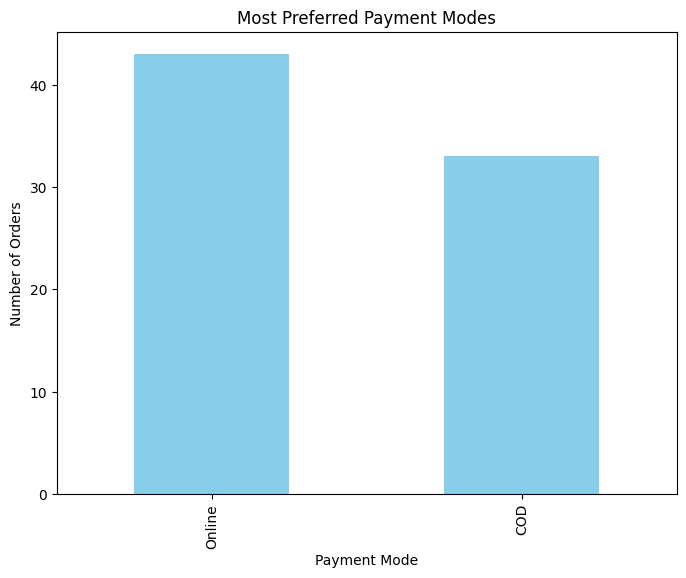

In [70]:
# Determine the most preferred payment modes
payment_mode_counts = order_data['payment_mode'].value_counts()
print(payment_mode_counts)
plt.figure(figsize=(8, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.show()

order_date
2023-11     21450.0
2023-12    429450.0
2024-01    503000.0
2024-02    446000.0
2024-03    186500.0
Freq: M, Name: total_price, dtype: float64


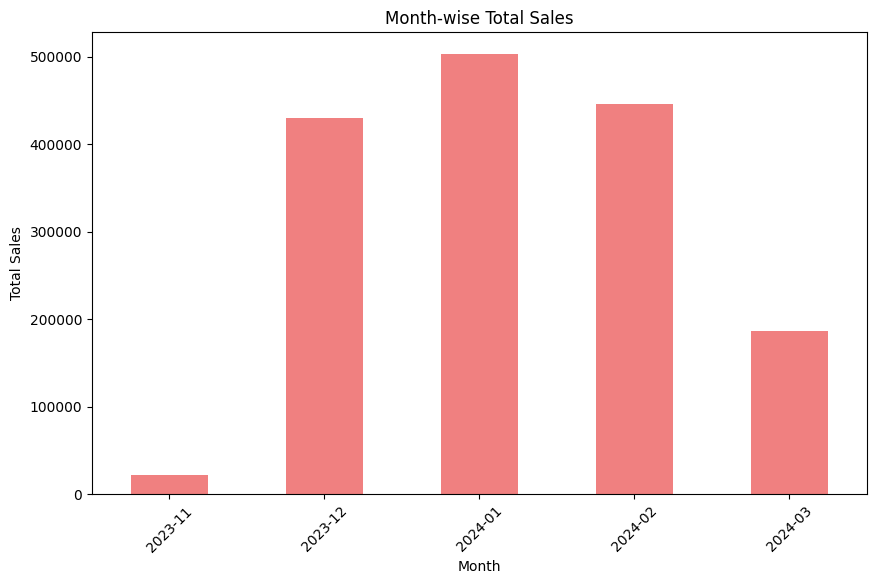

In [71]:
# Month wise total sales
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum()
print(monthly_sales)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightcoral')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

order_date
2023-11     21450.0
2023-12    429450.0
2024-01    503000.0
2024-02    446000.0
2024-03    186500.0
Freq: M, Name: total_price, dtype: float64


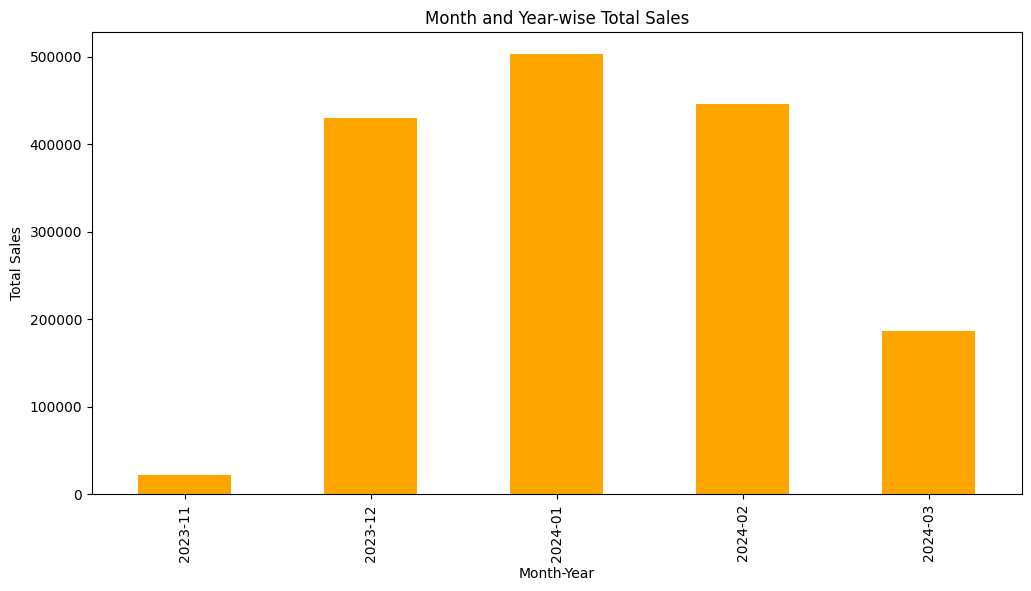

In [72]:
# Month and year wise total sales 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthly_yearly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum()
print(monthly_yearly_sales)
plt.figure(figsize=(12, 6))
monthly_yearly_sales.plot(kind='bar', color='orange')
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Peak Order Date: 2023-11-30 with 2 orders


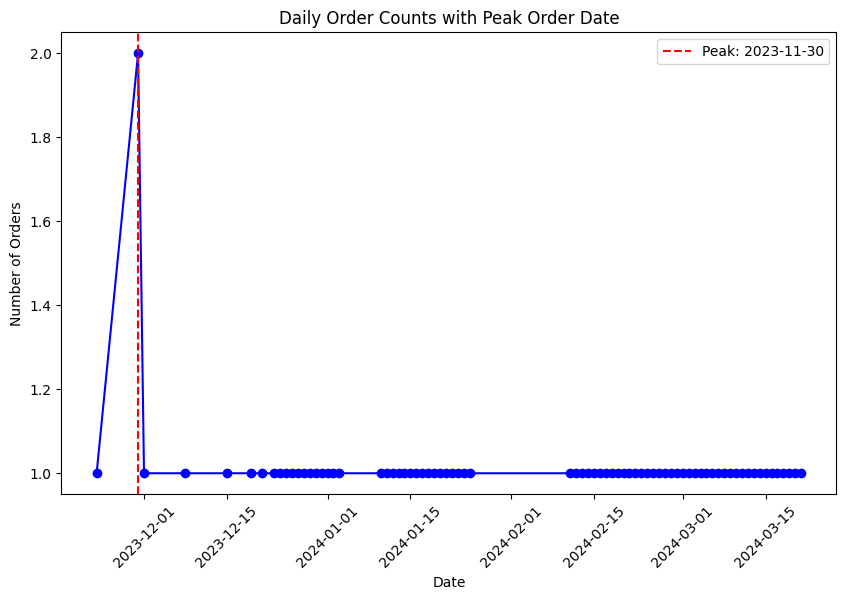

In [73]:
# Identify peak order date
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
daily_order_counts = order_data.groupby(order_data['order_date'].dt.date)['order_id'].count()
peak_order_date = daily_order_counts.idxmax()
peak_order_count = daily_order_counts.max()
print(f'Peak Order Date: {peak_order_date} with {peak_order_count} orders')
plt.figure(figsize=(10, 6))
plt.plot(daily_order_counts.index, daily_order_counts.values, marker='o', color='b')
plt.title('Daily Order Counts with Peak Order Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.axvline(x=peak_order_date, color='r', linestyle='--', label=f'Peak: {peak_order_date}')
plt.legend()
plt.show()

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


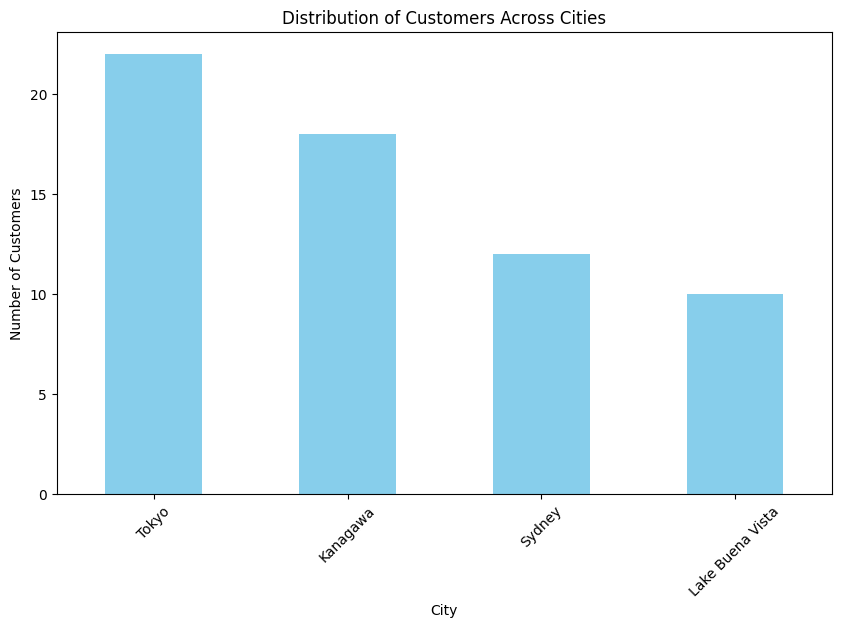

In [74]:
# Explore the distribution of customers across different cities.
customer_city_counts = customer_data['city'].value_counts()
print(customer_city_counts)
plt.figure(figsize=(10, 6))
customer_city_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

 final 
     order_id product_id     category              city
0          3       P112    Furniture             Tokyo
1          4       P102    furniture  Lake Buena Vista
2          5       P102    furniture  Lake Buena Vista
3          7       P103  Electronics          Kanagawa
4          8       P102    furniture          Kanagawa
..       ...        ...          ...               ...
71        91       P159    Appliance             Tokyo
72        92       P160    Appliance  Lake Buena Vista
73        93       P161    Appliance          Kanagawa
74        94       P162  Electronics            Sydney
75        95       P154  Electronics             Tokyo

[76 rows x 4 columns]
category          Appliance  Electronics  Furniture  furniture
city                                                          
Kanagawa                8.0         11.0        5.0        1.0
Lake Buena Vista        4.0          7.0        2.0        2.0
Sydney                  5.0          7.0        2.0     

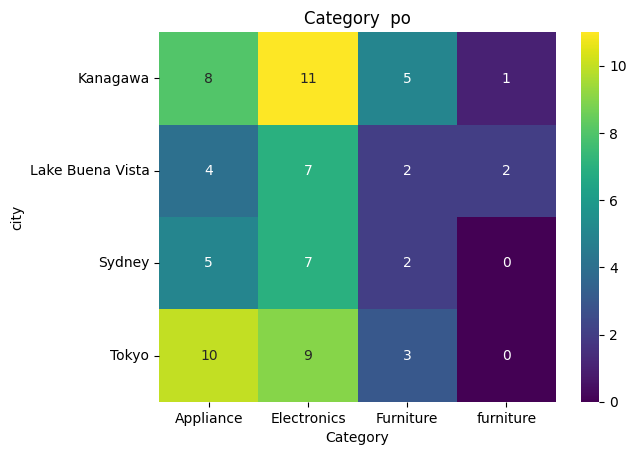

In [75]:
# merged_order_data with 'product_data' to get product information for each order
merged_order_data = pd.merge(order_data, product_data[['product_id', 'category']], on='product_id',how='left')

# merged_order_data 'customer_data' to get city information for each order
final_data=pd.merge(merged_order_data,customer_data[['customer_id', 'city']], on='customer_id',how='left')

# Display the final merged data
print(" final \n", final_data[['order_id','product_id', 'category','city']])

#Analyze populerity of catagories in each region and city
category_region_city_counts = final_data.groupby(['city','category']).size().unstack().fillna(0)

# Display the result
print(category_region_city_counts)

# plotting
sns.heatmap(category_region_city_counts,annot=True, cmap='viridis',fmt='g')
plt.title('Category  po')
plt.xlabel('Category')
plt.ylabel('city')
plt.show()

      product_name  quantity
5        Microwave       4.0
3             Desk       4.0
9     Refrigerator       3.0
0            Chair       3.0
4           Tablet       3.0
6       Television       3.0
20      Smartwatch       3.0
14       Desk Lamp       3.0
12  Vacuum Cleaner       3.0
10            Sofa       3.0


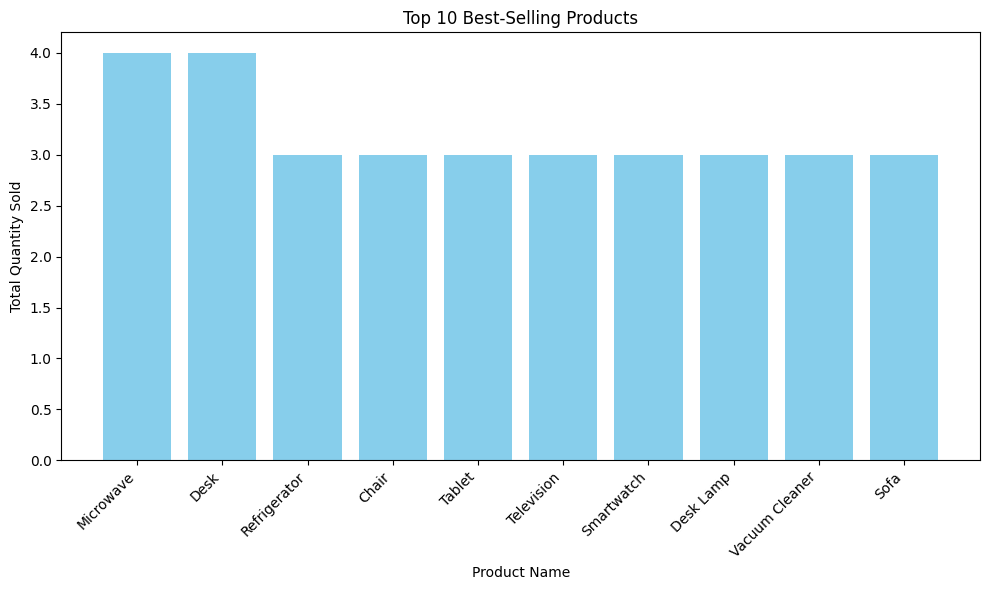

In [76]:
# Identify the best selling products
best_selling_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
best_selling_products = best_selling_products.merge(product_data, on='product_id')
best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)
print(best_selling_products[['product_name', 'quantity']].head(10))
plt.figure(figsize=(10, 6))
plt.bar(best_selling_products['product_name'].head(10), best_selling_products['quantity'].head(10), color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

      product_name  quantity
15         Printer       1.0
25      Television       1.0
26  Gaming Console       1.0
28  Water Purifier       1.0
21       Projector       1.0
19  Gaming Console       1.0
29          Tablet       1.0
30      Dishwasher       1.0
24      Smartwatch       1.0
16        Recliner       1.0


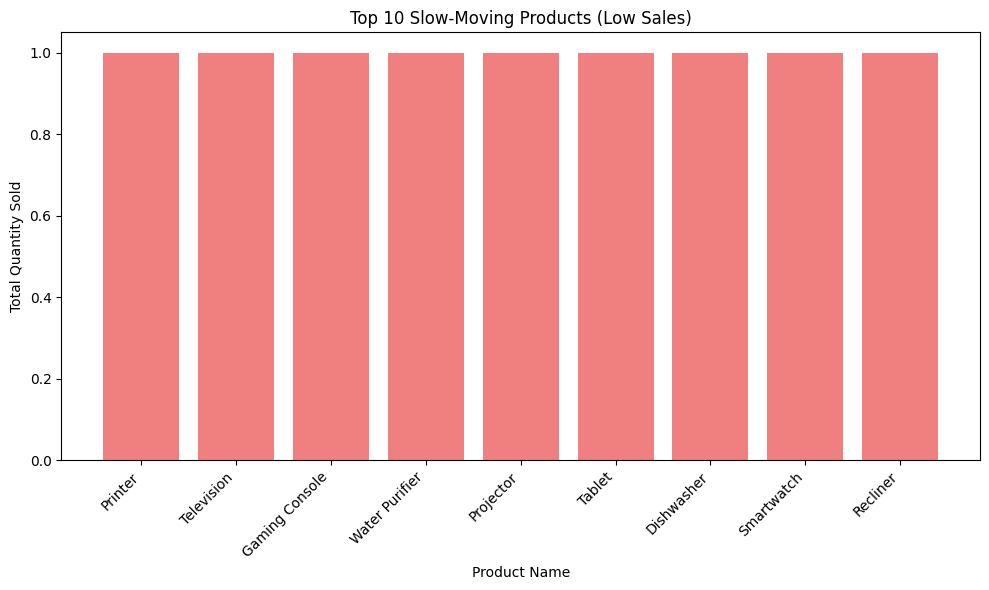

In [77]:
# Identify top 10 slow-moving products based on low sales.
slow_moving_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
slow_moving_products = slow_moving_products.merge(product_data, on='product_id')
slow_moving_products = slow_moving_products.sort_values(by='quantity', ascending=True)
print(slow_moving_products[['product_name', 'quantity']].head(10))
plt.figure(figsize=(10, 6))
plt.bar(slow_moving_products['product_name'].head(10), slow_moving_products['quantity'].head(10), color='lightcoral')
plt.title('Top 10 Slow-Moving Products (Low Sales)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


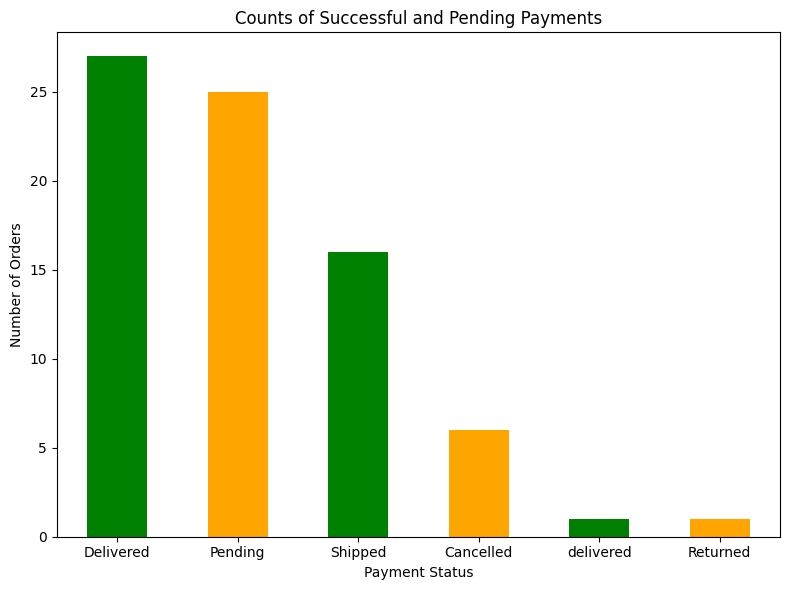

In [78]:
# Display successful and pending payments order counts
payment_status_counts = order_data['order_status'].value_counts()
print(payment_status_counts)
plt.figure(figsize=(8, 6))
payment_status_counts.plot(kind='bar', color=['green', 'orange'])
plt.title('Counts of Successful and Pending Payments')
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
db.close()